<a href="https://colab.research.google.com/github/RogerPineda13/Healthcare_Persistency_of_a_drug/blob/main/Cleaning_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [62]:
def value_counts(x):
  print(x.value_counts(normalize=True))

def y1_n0(x):
  x =x.replace({'Y': 1,'N':0})
  return x

In [63]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare_dataset.xlsx to Healthcare_dataset (1).xlsx


In [64]:
data = pd.read_excel("Healthcare_dataset.xlsx", sheet_name=1)
type(data)

pandas.core.frame.DataFrame

In [65]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [67]:
for col in data:
  print(data[col].unique())

['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
['Persistent' 'Non-Persistent']
['Male' 'Female']
['Caucasian' 'Asian' 'Other/Unknown' 'African American']
['Not Hispanic' 'Hispanic' 'Unknown']
['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
['>75' '55-65' '65-75' '<55']
['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'
 'VASCULAR SURGERY' 'CARDIO

In [68]:
patient_id='Ptid'
data.drop(patient_id, axis=1, inplace=True)

In [69]:
value_counts(data['Race'])
value_counts(data['Ethnicity'])
value_counts(data['Region'])
value_counts(data['Ntm_Speciality'])
value_counts(data['Ntm_Specialist_Flag'])
value_counts(data['Ntm_Speciality_Bucket'])

Caucasian           0.919393
Other/Unknown       0.028329
African American    0.027745
Asian               0.024533
Name: Race, dtype: float64
Not Hispanic    0.944801
Hispanic        0.028621
Unknown         0.026577
Name: Ethnicity, dtype: float64
Midwest          0.403914
South            0.364194
West             0.146612
Northeast        0.067757
Other/Unknown    0.017523
Name: Region, dtype: float64
GENERAL PRACTITIONER                                              0.448306
RHEUMATOLOGY                                                      0.176402
ENDOCRINOLOGY                                                     0.133762
Unknown                                                           0.090537
ONCOLOGY                                                          0.065713
OBSTETRICS AND GYNECOLOGY                                         0.026285
UROLOGY                                                           0.009638
ORTHOPEDIC SURGERY                                                

In [70]:
value_counts(data['Risk_Segment_During_Rx'])
value_counts(data['Change_T_Score'])
value_counts(data['Tscore_Bucket_During_Rx'])
value_counts(data['Change_Risk_Segment'])

Unknown    0.437208
HR_VHR     0.281834
VLR_LR     0.280958
Name: Risk_Segment_During_Rx, dtype: float64
No change    0.484813
Unknown      0.437208
Worsened     0.050526
Improved     0.027453
Name: Change_T_Score, dtype: float64
Unknown    0.437208
<=-2.5     0.297021
>-2.5      0.265771
Name: Tscore_Bucket_During_Rx, dtype: float64
Unknown      0.650993
No change    0.307243
Worsened     0.035339
Improved     0.006425
Name: Change_Risk_Segment, dtype: float64


In [71]:
data['Tscore_Bucket_Prior_Ntm'].value_counts()

>-2.5     1951
<=-2.5    1473
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

In [72]:
data.loc[data['Change_T_Score']=='Unknown',['Tscore_Bucket_Prior_Ntm', 'Tscore_Bucket_During_Rx']].value_counts()

Tscore_Bucket_Prior_Ntm  Tscore_Bucket_During_Rx
>-2.5                    Unknown                    869
<=-2.5                   Unknown                    628
dtype: int64

In [73]:
#See that can not use Tscore_Bucket_During_Rx to fill in missing in the Chane_T_Score column

In [74]:
dropped_columns = ['Risk_Segment_During_Rx','Change_T_Score', 'Tscore_Bucket_During_Rx','Change_Risk_Segment']
data.drop(dropped_columns, axis=1, inplace=True)

Filling in column values

In [75]:
# Race
# Majority is Caucasian so safe to use mode value of Caucasian to fill in unknown
data['Race'] = data['Race'].replace(['Other/Unknown'],'Caucasian')
value_counts(data['Race'])


Caucasian           0.947722
African American    0.027745
Asian               0.024533
Name: Race, dtype: float64


In [76]:
# Ethnicity
# Majority is Not Hispanic with 94% of the values being so therefore safe to use the mode to fill in values
data['Ethnicity'] = data['Ethnicity'].replace(['Unknown'], 'Not Hispanic')
value_counts(data['Ethnicity'])

Not Hispanic    0.971379
Hispanic        0.028621
Name: Ethnicity, dtype: float64


In [77]:
# Region
#Will use the ethnicity column to find clues since it has the highest percentage on completed values
data.loc[data['Region']=='Other/Unknown',['Ethnicity']].value_counts()


Ethnicity   
Not Hispanic    59
Hispanic         1
dtype: int64

In [78]:
#Majority of the most unknown ethnic group is Not Hispanic for an unknown region. Therefore can use the mode for the Ethnic group not hispanic to fill in missing Region values
#Most common region is Midwest
data['Region'] = data['Region'].replace(['Other/Unknown'],'Midwest')
value_counts(data['Region'])

Midwest      0.421437
South        0.364194
West         0.146612
Northeast    0.067757
Name: Region, dtype: float64


In [79]:
#Finding all the columns whose values are just Y or N
yes= ['Y']
list_of_columns=data.columns[data.isin(yes).any()]

In [80]:
#Changing all the Y's to 1's and N's to 0
for a in list_of_columns:
  data[a] = y1_n0(data[a]) 

In [81]:
for col in data:
  print(data[col].unique())

['Persistent' 'Non-Persistent']
['Male' 'Female']
['Caucasian' 'Asian' 'African American']
['Not Hispanic' 'Hispanic']
['West' 'Midwest' 'South' 'Northeast']
['>75' '55-65' '65-75' '<55']
['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'
 'VASCULAR SURGERY' 'CARDIOLOGY' 'NUCLEAR MEDICINE']
['Others' 'Specialist']
['OB/GYN/Others/PCP/Unknown' 'Endo/On

In [82]:
# Doesn't follow bell curve so will use MinMax Scaller
scaler = MinMaxScaler()

#Scaling Dexa
dexa = ['Dexa_Freq_During_Rx']
dexa_s = scaler.fit_transform(data[dexa])
dexa_s = pd.DataFrame(dexa_s, index=data.index)
dexa_s.columns = dexa
data['Dexa_Freq_During_Rx'] = dexa_s['Dexa_Freq_During_Rx']


In [83]:
data_eda = data.copy()
with open('data1.pkl', 'wb') as datapickle:
    pickle.dump(data_eda ,datapickle)

In [84]:
list_of_str_columns=data.select_dtypes(include='object').columns
list_of_str_columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag'],
      dtype='object')

In [85]:
b_ohe = data[['Gender']]
ohe = OneHotEncoder(categories='auto', sparse=False)
b_ohet = pd.DataFrame(ohe.fit_transform(b_ohe), index = data.index)
b_ohet.columns=ohe.get_feature_names(['Gender'])

c_ohe = data[['Race']]
ohe = OneHotEncoder(categories='auto', sparse=False)
c_ohet = pd.DataFrame(ohe.fit_transform(c_ohe), index = data.index)
c_ohet.columns=ohe.get_feature_names(['Race'])

d_ohe = data[['Ethnicity']]
ohe = OneHotEncoder(categories='auto', sparse=False)
d_ohet = pd.DataFrame(ohe.fit_transform(d_ohe), index = data.index)
d_ohet.columns=ohe.get_feature_names(['Ethnicity'])

e_ohe = data[['Region']]
ohe = OneHotEncoder(categories='auto', sparse=False)
e_ohet = pd.DataFrame(ohe.fit_transform(e_ohe), index = data.index)
e_ohet.columns=ohe.get_feature_names(['Region'])

f_ohe = data[['Age_Bucket']]
ohe = OneHotEncoder(categories='auto', sparse=False)
f_ohet = pd.DataFrame(ohe.fit_transform(f_ohe), index = data.index)
f_ohet.columns=ohe.get_feature_names(['Age_Bucket'])

g_ohe = data[['Ntm_Speciality']]
ohe = OneHotEncoder(categories='auto', sparse=False)
g_ohet = pd.DataFrame(ohe.fit_transform(g_ohe), index = data.index)
g_ohet.columns=ohe.get_feature_names(['Ntm_Speciality'])

h_ohe = data[['Ntm_Specialist_Flag']]
ohe = OneHotEncoder(categories='auto', sparse=False)
h_ohet = pd.DataFrame(ohe.fit_transform(h_ohe), index = data.index)
h_ohet.columns=ohe.get_feature_names(['Ntm_Specialist_Flag'])

i_ohe = data[['Ntm_Speciality_Bucket']]
ohe = OneHotEncoder(categories='auto', sparse=False)
i_ohet = pd.DataFrame(ohe.fit_transform(i_ohe), index = data.index)
i_ohet.columns=ohe.get_feature_names(['Ntm_Speciality_Bucket'])

j_ohe = data[['Risk_Segment_Prior_Ntm']]
ohe = OneHotEncoder(categories='auto', sparse=False)
j_ohet = pd.DataFrame(ohe.fit_transform(j_ohe), index = data.index)
j_ohet.columns=ohe.get_feature_names(['Risk_Segment_Prior_Ntm'])

k_ohe = data[['Tscore_Bucket_Prior_Ntm']]
ohe = OneHotEncoder(categories='auto', sparse=False)
k_ohet = pd.DataFrame(ohe.fit_transform(k_ohe), index = data.index)
k_ohet.columns=ohe.get_feature_names(['Tscore_Bucket_Prior_Ntm'])

l_ohe = data[['Adherent_Flag']]
ohe = OneHotEncoder(categories='auto', sparse=False)
l_ohet = pd.DataFrame(ohe.fit_transform(l_ohe), index = data.index)
l_ohet.columns=ohe.get_feature_names(['Adherent_Flag'])

m_ohe = data[['Count_Of_Risks']]
ohe = OneHotEncoder(categories='auto', sparse=False)
m_ohet = pd.DataFrame(ohe.fit_transform(m_ohe), index = data.index)
m_ohet.columns=ohe.get_feature_names(['Count_Of_Risks'])

data_new = pd.concat([data,b_ohet,c_ohet,d_ohet,f_ohet,g_ohet,h_ohet,i_ohet,j_ohet,k_ohet,l_ohet, m_ohet], axis=1)

In [86]:
data_new.drop(['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket','Ntm_Speciality', 'Ntm_Speciality_Bucket','Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm','Adherent_Flag', 'Ntm_Specialist_Flag', 'Count_Of_Risks'], axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa38ade50>]],
      dtype=object)

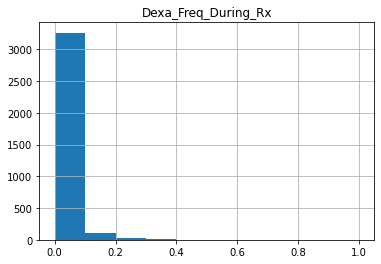

In [87]:
data_new.hist('Dexa_Freq_During_Rx')

In [88]:
# Changing our target to 0 for Non-Persistent and 1 for Persistent
data_new['Persistency_Flag'] = data_new['Persistency_Flag'].replace({'Persistent': 1, 'Non-Persistent':0})
for col in data_new:
  print(data_new[col].unique())

[1 0]
[0 1]
[0 1]
[0.         0.01369863 0.04794521 0.02054795 0.03424658 0.1369863
 0.0890411  0.00684932 0.04109589 0.08219178 0.02739726 0.06849315
 0.17123288 0.07534247 0.12328767 0.14383562 0.10273973 0.19178082
 0.15068493 0.25342466 0.09589041 0.05479452 0.06164384 0.11643836
 0.55479452 0.28767123 0.10958904 0.20547945 0.13013699 0.30821918
 0.18493151 0.16438356 0.39726027 0.17808219 0.15753425 0.2260274
 0.75342466 0.24657534 0.23287671 0.60273973 0.45205479 0.21917808
 0.80821918 0.32876712 0.47260274 0.26027397 0.2739726  0.46575342
 0.35616438 0.34246575 1.         0.30136986 0.23972603 0.26712329
 0.73972603 0.36986301 0.49315068 0.19863014]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]

In [89]:
data_new.head()

,Persistency_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Count_Of_Risks_0,Count_Of_Risks_1,Count_Of_Risks_2,Count_Of_Risks_3,Count_Of_Risks_4,Count_Of_Risks_5,Count_Of_Risks_6,Count_Of_Risks_7
0,1,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
